In [6]:
!pip install scikit-fuzzy

In [7]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [8]:
#criação das variáveis
#define as unidades de cada varíaveis 
#nb- ńivel da barragem, podendo variar de 0 at́é 20 metros
#nr- ńivel do rio, podendo variar de 0 at́é 12 metros
#nb- ńivel da barragem, podendo varia de 0 at́é 20 metros
#op - operação na barragem, considerando 8 comportas para a operação
#x_nb = np.arange(0, 20, 1)
nivelRio = ctrl.Antecedent(np.arange(0, 13, 1), 'nivelRio')
qtChuva = ctrl.Antecedent(np.arange(0, 60, 1), 'qtChuva')
operacao = ctrl.Consequent(np.arange(0, 11, 1), 'operacao')

In [9]:
nivelRio.automf(names=['normal', 'medio', 'alto'])
qtChuva.automf(names=['pouca', 'media', 'bastante'])
operacao.automf(3)

In [10]:
#processo de fuzzificação da variável operacao

operacao['aberta'] = fuzz.trimf(operacao.universe, [0, 0, 5])
operacao['meio'] = fuzz.trimf(operacao.universe, [0, 5, 10])
operacao['fechada'] = fuzz.trimf(operacao.universe, [5, 10, 10])

/home/momo/anaconda3/lib/python3.8/site-packages/skfuzzy/control/term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


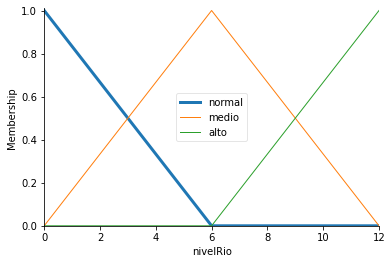

In [11]:
nivelRio['normal'].view()

/home/momo/anaconda3/lib/python3.8/site-packages/skfuzzy/control/term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


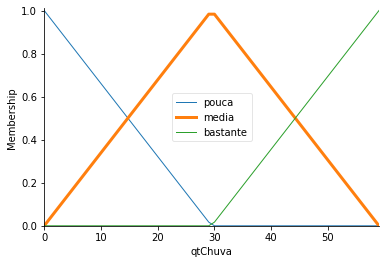

In [12]:
qtChuva['media'].view()

/home/momo/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


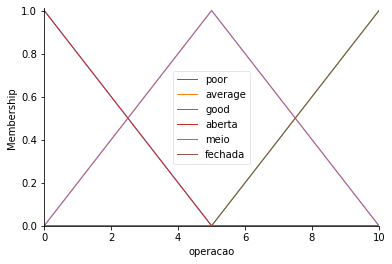

In [13]:
operacao.view()

In [14]:
regra1 = ctrl.Rule(nivelRio['normal'] | qtChuva['pouca'], operacao['aberta'])

In [15]:
regra2 = ctrl.Rule(nivelRio['normal'] | qtChuva['media'], operacao['aberta'])

In [16]:
regra3 = ctrl.Rule(nivelRio['normal'] | qtChuva['bastante'], operacao['meio'])

In [17]:
regra4 = ctrl.Rule(nivelRio['medio'] | qtChuva['pouca'], operacao['meio'])

In [18]:
regra5 = ctrl.Rule(nivelRio['medio'] | qtChuva['media'], operacao['fechada'])

In [19]:
regra6 = ctrl.Rule(nivelRio['medio'] | qtChuva['bastante'], operacao['fechada'])

In [20]:
regra7 = ctrl.Rule(nivelRio['alto'] | qtChuva['pouca'], operacao['fechada'])

In [21]:
regra8 = ctrl.Rule(nivelRio['alto'] | qtChuva['media'], operacao['fechada'])

In [22]:
regra9 = ctrl.Rule(nivelRio['alto'] | qtChuva['bastante'], operacao['fechada'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f33bf5edca0>)

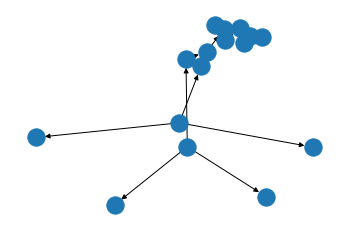

In [23]:
regra1.view()

In [24]:
tipping_ctrl = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9])

In [25]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [50]:
x=[]
y=[]
z=[]
p=[]

x=[4.5, 5.9, 7.3, 8.9, 10.8, 12.0]
y=[0, 40, 2, 3, 0, 0]



i=0

# Loop through the system 21*21 times to collect the control surface
for i in range(6):
    for j in range(6):
        tipping.input['nivelRio'] = x[i]
        tipping.input['qtChuva'] = y[j]
        tipping.compute()
        a = tipping.output['operacao']
        z.append(a)

In [51]:
print(z)

[5.0, 5.099723152944049, 5.0, 5.0, 5.0, 5.0, 5.0, 5.1912129724588345, 5.006947067265694, 5.016037655600138, 5.0, 5.0, 5.0, 5.122819640242632, 5.0, 5.0, 5.0, 5.0, 5.0, 4.999999999999999, 5.0, 5.0, 5.0, 5.0, 5.0, 5.176924772121261, 5.0, 5.0, 5.0, 5.0, 5.0, 5.260828286543327, 5.007422660808513, 5.016602474746114, 5.0, 5.0]


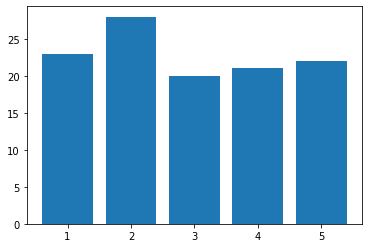

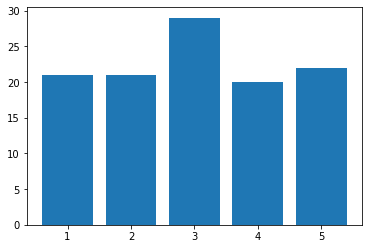

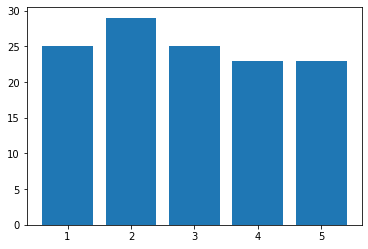

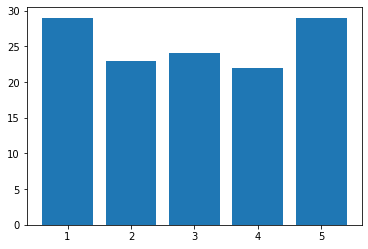

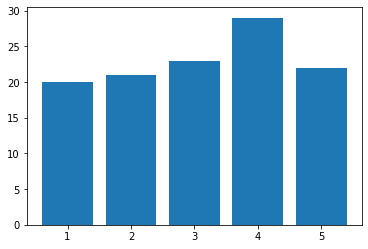

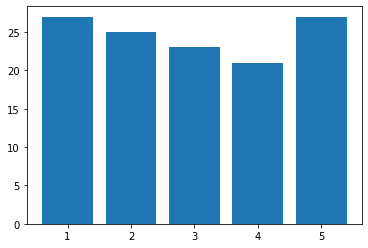

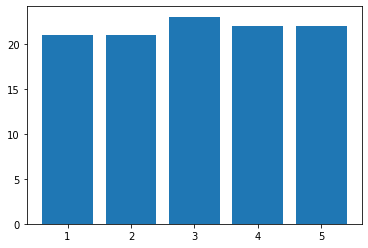

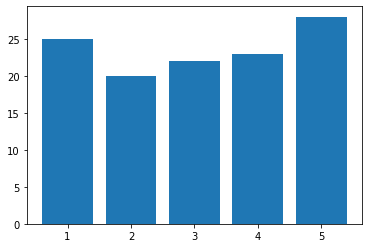

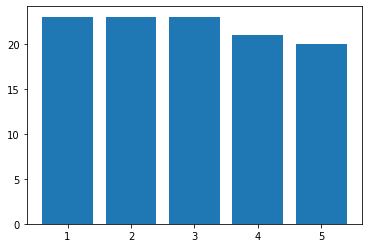

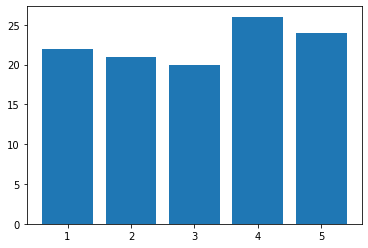

In [64]:
x = np.arange(1,6)


plt.ion()

for i in range(10):
    dados = np.random.randint(20, 30, 5)
    plt.cla()
    plt.clf()
    plt.bar(x, dados)
    plt.pause(1)
plt.ioff()
plt.show()


In [35]:
tipping.input['nivelRio'] = 4.5
tipping.input['qtChuva'] = 0.0

In [36]:
tipping.compute()

5.0


/home/momo/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


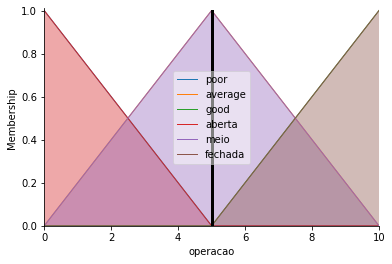

In [37]:
print (tipping.output['operacao'])
operacao.view(sim=tipping)